In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
database = automap_base()

# reflect the tables
database.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
database.classes.keys()


['measurement', 'station']

In [7]:
# Save references to each table
measurement = database.classes.measurement
station = database.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first().date
recent_date

'2017-08-23'

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
prior_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

prior_year

datetime.date(2016, 8, 23)

In [76]:
# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(measurement.date, measurement.prcp).filter(measurement.date >= prior_year).order_by(measurement.date).all()

precipitation[1:40]

[('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0)]

In [49]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(precipitation).set_index('date')
df = df.rename(columns={'prcp':'precipitation'})

df

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [51]:
# Sort the dataframe by date
df = df.sort_values(by='date').dropna()

df

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


Text(0.5, 0, 'Date')

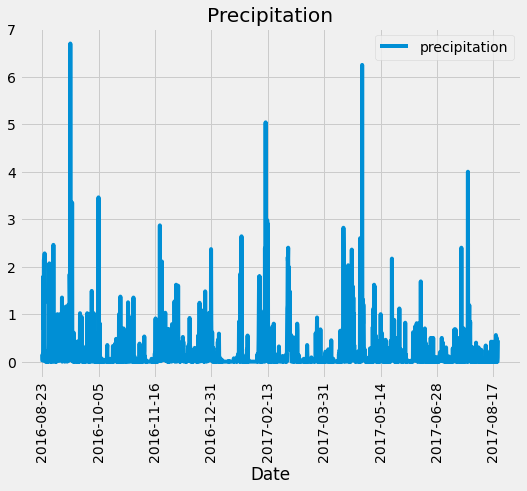

In [56]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90, figsize=(8, 6))
plt.title("Precipitation")
plt.xlabel("Date")


In [57]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [59]:
# Design a query to calculate the total number stations in the dataset
station_num = session.query(station.id).count()
print(f"There is a total of {station_num} stations in this dataset")

There is a total of 9 stations in this dataset


In [60]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [67]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = "USC00519281"

lowest = session.query(func.min(measurement.tobs)).filter(measurement.station == most_active).scalar()
highest = session.query(func.max(measurement.tobs)).filter(measurement.station == most_active).scalar()
avg = session.query(func.avg(measurement.tobs)).filter(measurement.station == most_active).scalar()

print(f'The lowest is {lowest}')
print(f'The highest is {highest}')
print(f'The average is {avg}')

The lowest is 54.0
The highest is 85.0
The average is 71.66378066378067


In [71]:
# Using the most active station id
most_active_station = active_station[0][0]

results = session.query(measurement.date, measurement.tobs).filter(measurement.date >= "2016-08-24").filter(measurement.date <= "2017-08-23").\
                        filter(measurement.station == most_active_station).all()

new_df = pd.DataFrame(results)

new_df

,date,tobs
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0
...,...,...
346,2017-08-14,77.0
347,2017-08-15,77.0
348,2017-08-16,76.0
349,2017-08-17,76.0


<function matplotlib.pyplot.show(*args, **kw)>

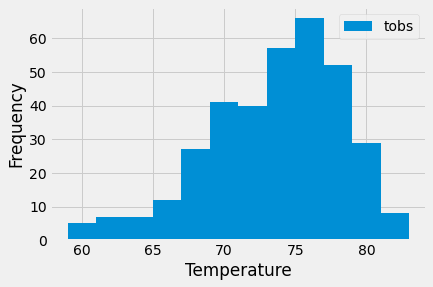

In [72]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
new_df.plot.hist(bins=12)

plt.ylabel('Frequency')
plt.xlabel('Temperature')


plt.show

# Close session

In [ ]:
# Close Session
session.close()